Mean Squared Error: 2401991157.9926386
R-squared: 0.6868462835724035
Predicted Sale Price for the new property: 232330.9087644105


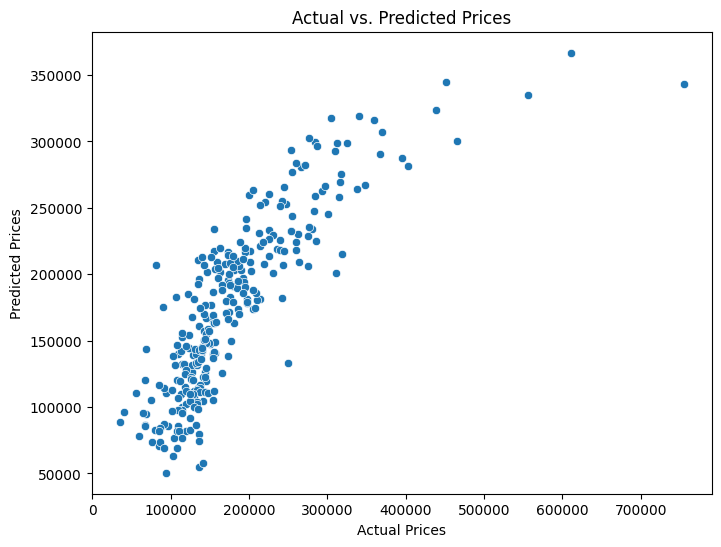

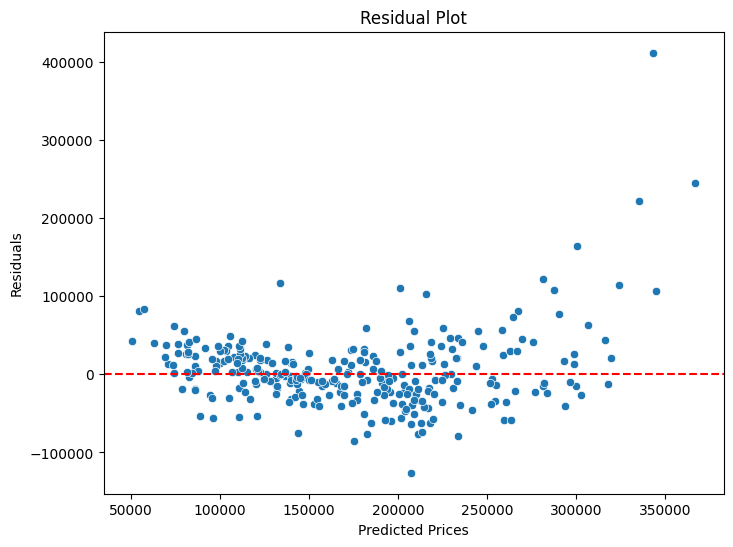

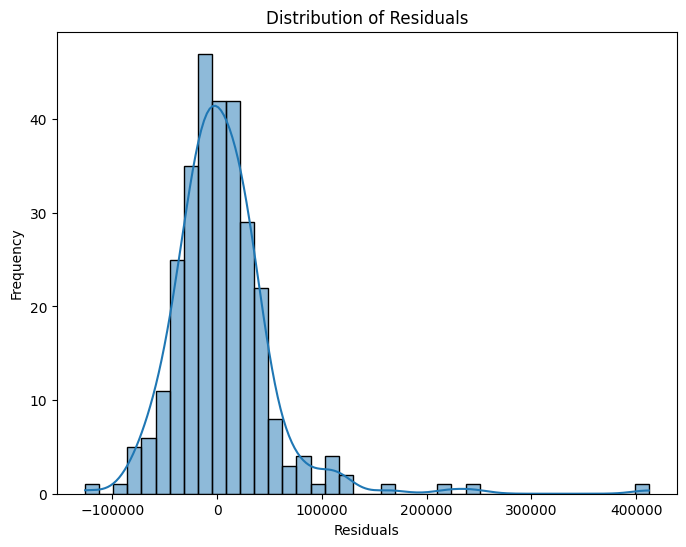

In [5]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Load your dataset (replace 'your_dataset.csv' with the actual file name or provide the data in another way)
data = pd.read_csv('/content/archive (3).zip')

# Define the features (independent variables) and the target (dependent variable)
X = data[['BsmtFullBath','FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd','Fireplaces','GarageCars','GarageArea','WoodDeckSF','OpenPorchSF','EnclosedPorch','3SsnPorch','ScreenPorch','PoolArea','MiscVal','MoSold','YrSold']]
y = data['SalePrice']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a linear regression model
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Evaluate the model's performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

# You can also use the trained model to make predictions for new data
# new_data = pd.DataFrame({'PlayedGames': [...], 'WonGames': [...], 'DrawnGames': [...], 'LostGames': [...], 'BasketGiven': [...]})
# new_predictions = model.predict(new_data)
new_property_features = pd.DataFrame({
    'BsmtFullBath': [1],
    'FullBath': [2],
    'HalfBath': [0],
    'BedroomAbvGr': [3],
    'KitchenAbvGr': [1],
    'TotRmsAbvGrd': [7],
    'Fireplaces': [1],
    'GarageCars': [2],
    'GarageArea': [500],
    'WoodDeckSF': [250],
    'OpenPorchSF': [50],
    'EnclosedPorch': [0],
    '3SsnPorch': [0],
    'ScreenPorch': [0],
    'PoolArea': [0],
    'MiscVal': [0],
    'MoSold': [5],
    'YrSold': [2022]
})

predicted_sale_price = model.predict(new_property_features)
print("Predicted Sale Price for the new property:", predicted_sale_price[0])

import matplotlib.pyplot as plt
import seaborn as sns

# Scatterplot of Actual vs. Predicted Prices
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs. Predicted Prices")
plt.show()
# Residual Plot
residuals = y_test - y_pred
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_pred, y=residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel("Predicted Prices")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()
# Distribution of Residuals
plt.figure(figsize=(8, 6))
sns.histplot(residuals, kde=True)
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.title("Distribution of Residuals")
plt.show()
